## solar power prediction using linear regression

In [1]:
# import necessary libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 

In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
# load the dataset
df=pd.read_csv('dataset/solar.csv')
# display first few rows of the dataset
df.head()

temperature_2_m_above_gnd  relative_humidity_2_m_above_gnd  \
0                       2.17                               31   
1                       2.31                               27   
2                       3.65                               33   
3                       5.82                               30   
4                       7.73                               27   

   mean_sea_level_pressure_MSL  total_precipitation_sfc  snowfall_amount_sfc  \
0                       1035.0                      0.0                  0.0   
1                       1035.1                      0.0                  0.0   
2                       1035.4                      0.0                  0.0   
3                       1035.4                      0.0                  0.0   
4                       1034.4                      0.0                  0.0   

   total_cloud_cover_sfc  high_cloud_cover_high_cld_lay  \
0                    0.0                              0   
1                    0.0                              0   
2                    0.0                              0   
3                    0.0                              0   
4                    0.0                              0   

   medium_cloud_cover_mid_cld_lay  low_cloud_cover_low_cld_lay  \
0                               0                            0   
1                               0                            0   
2                               0                            0   
3                               0                            0   
4                               0                            0   

   shortwave_radiation_backwards_sfc  ...  wind_direction_10_m_above_gnd  \
0                               0.00  ...                         312.71   
1                               1.78  ...                         294.78   
2                             108.58  ...                         270.00   
3                             258.10  ...                         323.13   
4                             375.58  ...                          10.01   

   wind_speed_80_m_above_gnd  wind_direction_80_m_above_gnd  \
0                       9.36                          22.62   
1                       5.99                          32.74   
2                       3.89                          56.31   
3                       3.55                          23.96   
4                       6.76                          25.20   

   wind_speed_900_mb  wind_direction_900_mb  wind_gust_10_m_above_gnd  \
0               6.62                 337.62                     24.48   
1               4.61                 321.34                     21.96   
2               3.76                 286.70                     14.04   
3               3.08                 339.44                     19.80   
4               6.62                  22.38                     16.56   

   angle_of_incidence     zenith    azimuth  generated_power_kw  
0           58.753108  83.237322  128.33543           454.10095  
1           45.408585  75.143041  139.65530          1411.99940  
2           32.848282  68.820648  152.53769          2214.84930  
3           22.699288  64.883536  166.90159          2527.60920  
4           19.199908  63.795208  182.13526          2640.20340  

[5 rows x 21 columns]

In [5]:
# to check the total number of rows & columns
df.shape

(4213, 21)

In [6]:
# display summary
df.describe()

temperature_2_m_above_gnd  relative_humidity_2_m_above_gnd  \
count                4213.000000                      4213.000000   
mean                   15.068111                        51.361025   
std                     8.853677                        23.525864   
min                    -5.350000                         7.000000   
25%                     8.390000                        32.000000   
50%                    14.750000                        48.000000   
75%                    21.290000                        70.000000   
max                    34.900000                       100.000000   

       mean_sea_level_pressure_MSL  total_precipitation_sfc  \
count                  4213.000000              4213.000000   
mean                   1019.337812                 0.031759   
std                       7.022867                 0.170212   
min                     997.500000                 0.000000   
25%                    1014.500000                 0.000000   
50%                    1018.100000                 0.000000   
75%                    1023.600000                 0.000000   
max                    1046.800000                 3.200000   

       snowfall_amount_sfc  total_cloud_cover_sfc  \
count          4213.000000            4213.000000   
mean              0.002808              34.056990   
std               0.038015              42.843638   
min               0.000000               0.000000   
25%               0.000000               0.000000   
50%               0.000000               8.700000   
75%               0.000000             100.000000   
max               1.680000             100.000000   

       high_cloud_cover_high_cld_lay  medium_cloud_cover_mid_cld_lay  \
count                    4213.000000                     4213.000000   
mean                       14.458818                       20.023499   
std                        30.711707                       36.387948   
min                         0.000000                        0.000000   
25%                         0.000000                        0.000000   
50%                         0.000000                        0.000000   
75%                         9.000000                       10.000000   
max                       100.000000                      100.000000   

       low_cloud_cover_low_cld_lay  shortwave_radiation_backwards_sfc  ...  \
count                  4213.000000                        4213.000000  ...   
mean                     21.373368                         387.759036  ...   
std                      38.013885                         278.459293  ...   
min                       0.000000                           0.000000  ...   
25%                       0.000000                         142.400000  ...   
50%                       0.000000                         381.810000  ...   
75%                      10.000000                         599.860000  ...   
max                     100.000000                         952.300000  ...   

       wind_direction_10_m_above_gnd  wind_speed_80_m_above_gnd  \
count                    4213.000000                4213.000000   
mean                      195.078452                  18.978483   
std                       106.626782                  11.999960   
min                         0.540000                   0.000000   
25%                       153.190000                  10.140000   
50%                       191.770000                  16.240000   
75%                       292.070000                  26.140000   
max                       360.000000                  66.880000   

       wind_direction_80_m_above_gnd  wind_speed_900_mb  \
count                    4213.000000         4213.00000   
mean                      191.166862           16.36319   
std                       108.760021            9.88533   
min                         1.120000            0.00000   
25%                       130.240000            9.18000   
50%                       187

In [ ]:
# check information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4213 entries, 0 to 4212
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   temperature_2_m_above_gnd          4213 non-null   float64
 1   relative_humidity_2_m_above_gnd    4213 non-null   int64  
 2   mean_sea_level_pressure_MSL        4213 non-null   float64
 3   total_precipitation_sfc            4213 non-null   float64
 4   snowfall_amount_sfc                4213 non-null   float64
 5   total_cloud_cover_sfc              4213 non-null   float64
 6   high_cloud_cover_high_cld_lay      4213 non-null   int64  
 7   medium_cloud_cover_mid_cld_lay     4213 non-null   int64  
 8   low_cloud_cover_low_cld_lay        4213 non-null   int64  
 9   shortwave_radiation_backwards_sfc  4213 non-null   float64
 10  wind_speed_10_m_above_gnd          4213 non-null   float64
 11  wind_direction_10_m_above_gnd      4213 non-null   float

In [8]:
# check for the missing values
df.isnull().sum()

temperature_2_m_above_gnd            0
relative_humidity_2_m_above_gnd      0
mean_sea_level_pressure_MSL          0
total_precipitation_sfc              0
snowfall_amount_sfc                  0
total_cloud_cover_sfc                0
high_cloud_cover_high_cld_lay        0
medium_cloud_cover_mid_cld_lay       0
low_cloud_cover_low_cld_lay          0
shortwave_radiation_backwards_sfc    0
wind_speed_10_m_above_gnd            0
wind_direction_10_m_above_gnd        0
wind_speed_80_m_above_gnd            0
wind_direction_80_m_above_gnd        0
wind_speed_900_mb                    0
wind_direction_900_mb                0
wind_gust_10_m_above_gnd             0
angle_of_incidence                   0
zenith                               0
azimuth                              0
generated_power_kw                   0
dtype: int64

In [9]:
# check duplicate values
df.duplicated().sum()

np.int64(0)

In [10]:
df.columns

Index(['temperature_2_m_above_gnd', 'relative_humidity_2_m_above_gnd',
       'mean_sea_level_pressure_MSL', 'total_precipitation_sfc',
       'snowfall_amount_sfc', 'total_cloud_cover_sfc',
       'high_cloud_cover_high_cld_lay', 'medium_cloud_cover_mid_cld_lay',
       'low_cloud_cover_low_cld_lay', 'shortwave_radiation_backwards_sfc',
       'wind_speed_10_m_above_gnd', 'wind_direction_10_m_above_gnd',
       'wind_speed_80_m_above_gnd', 'wind_direction_80_m_above_gnd',
       'wind_speed_900_mb', 'wind_direction_900_mb',
       'wind_gust_10_m_above_gnd', 'angle_of_incidence', 'zenith', 'azimuth',
       'generated_power_kw'],
      dtype='object')

In [11]:
import matplotlib.pyplot as plt

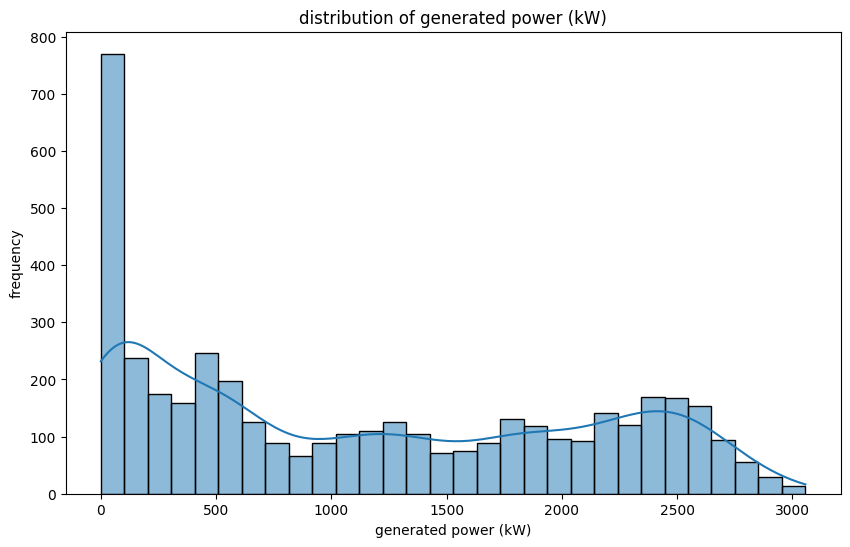

In [12]:
# plot distribution of power
plt.figure(figsize=(10,6))
sns.histplot(df['generated_power_kw'],bins=30,kde=True)
plt.title('distribution of generated power (kW)')
plt.xlabel('generated power (kW)')
plt.ylabel('frequency')
plt.show()

# EDA ie Exploratory Data Analysis

### histograms for remaining columns

In [13]:
df[df.columns[:9]].hist(bins=30,figsize=(15,30))
plt.show()

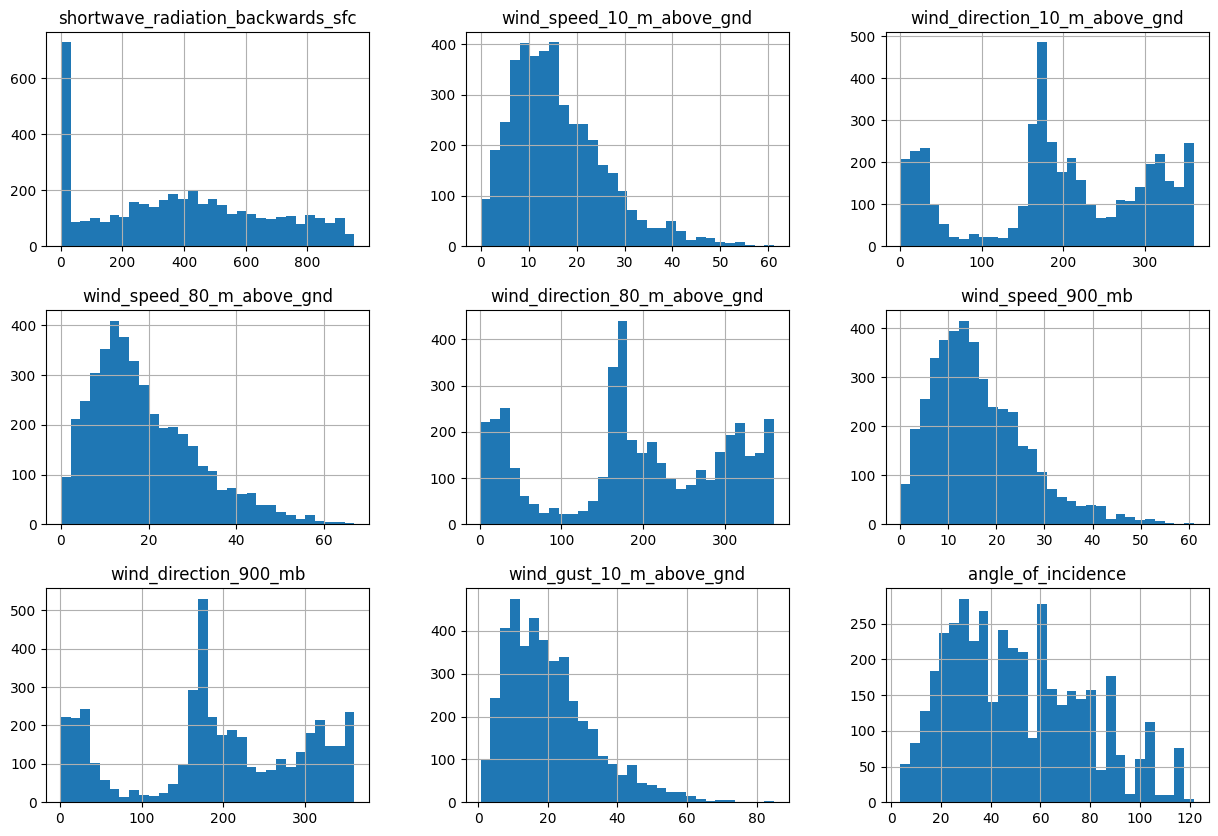

In [14]:
df[df.columns[9:18]].hist(bins=30,figsize=(15,10))
plt.show()

In [15]:
df[df.columns[18:20]].hist(bins=30,figsize=(15,10))
plt.show()

## Bivariate Analysis
### scatter plot with the target feature

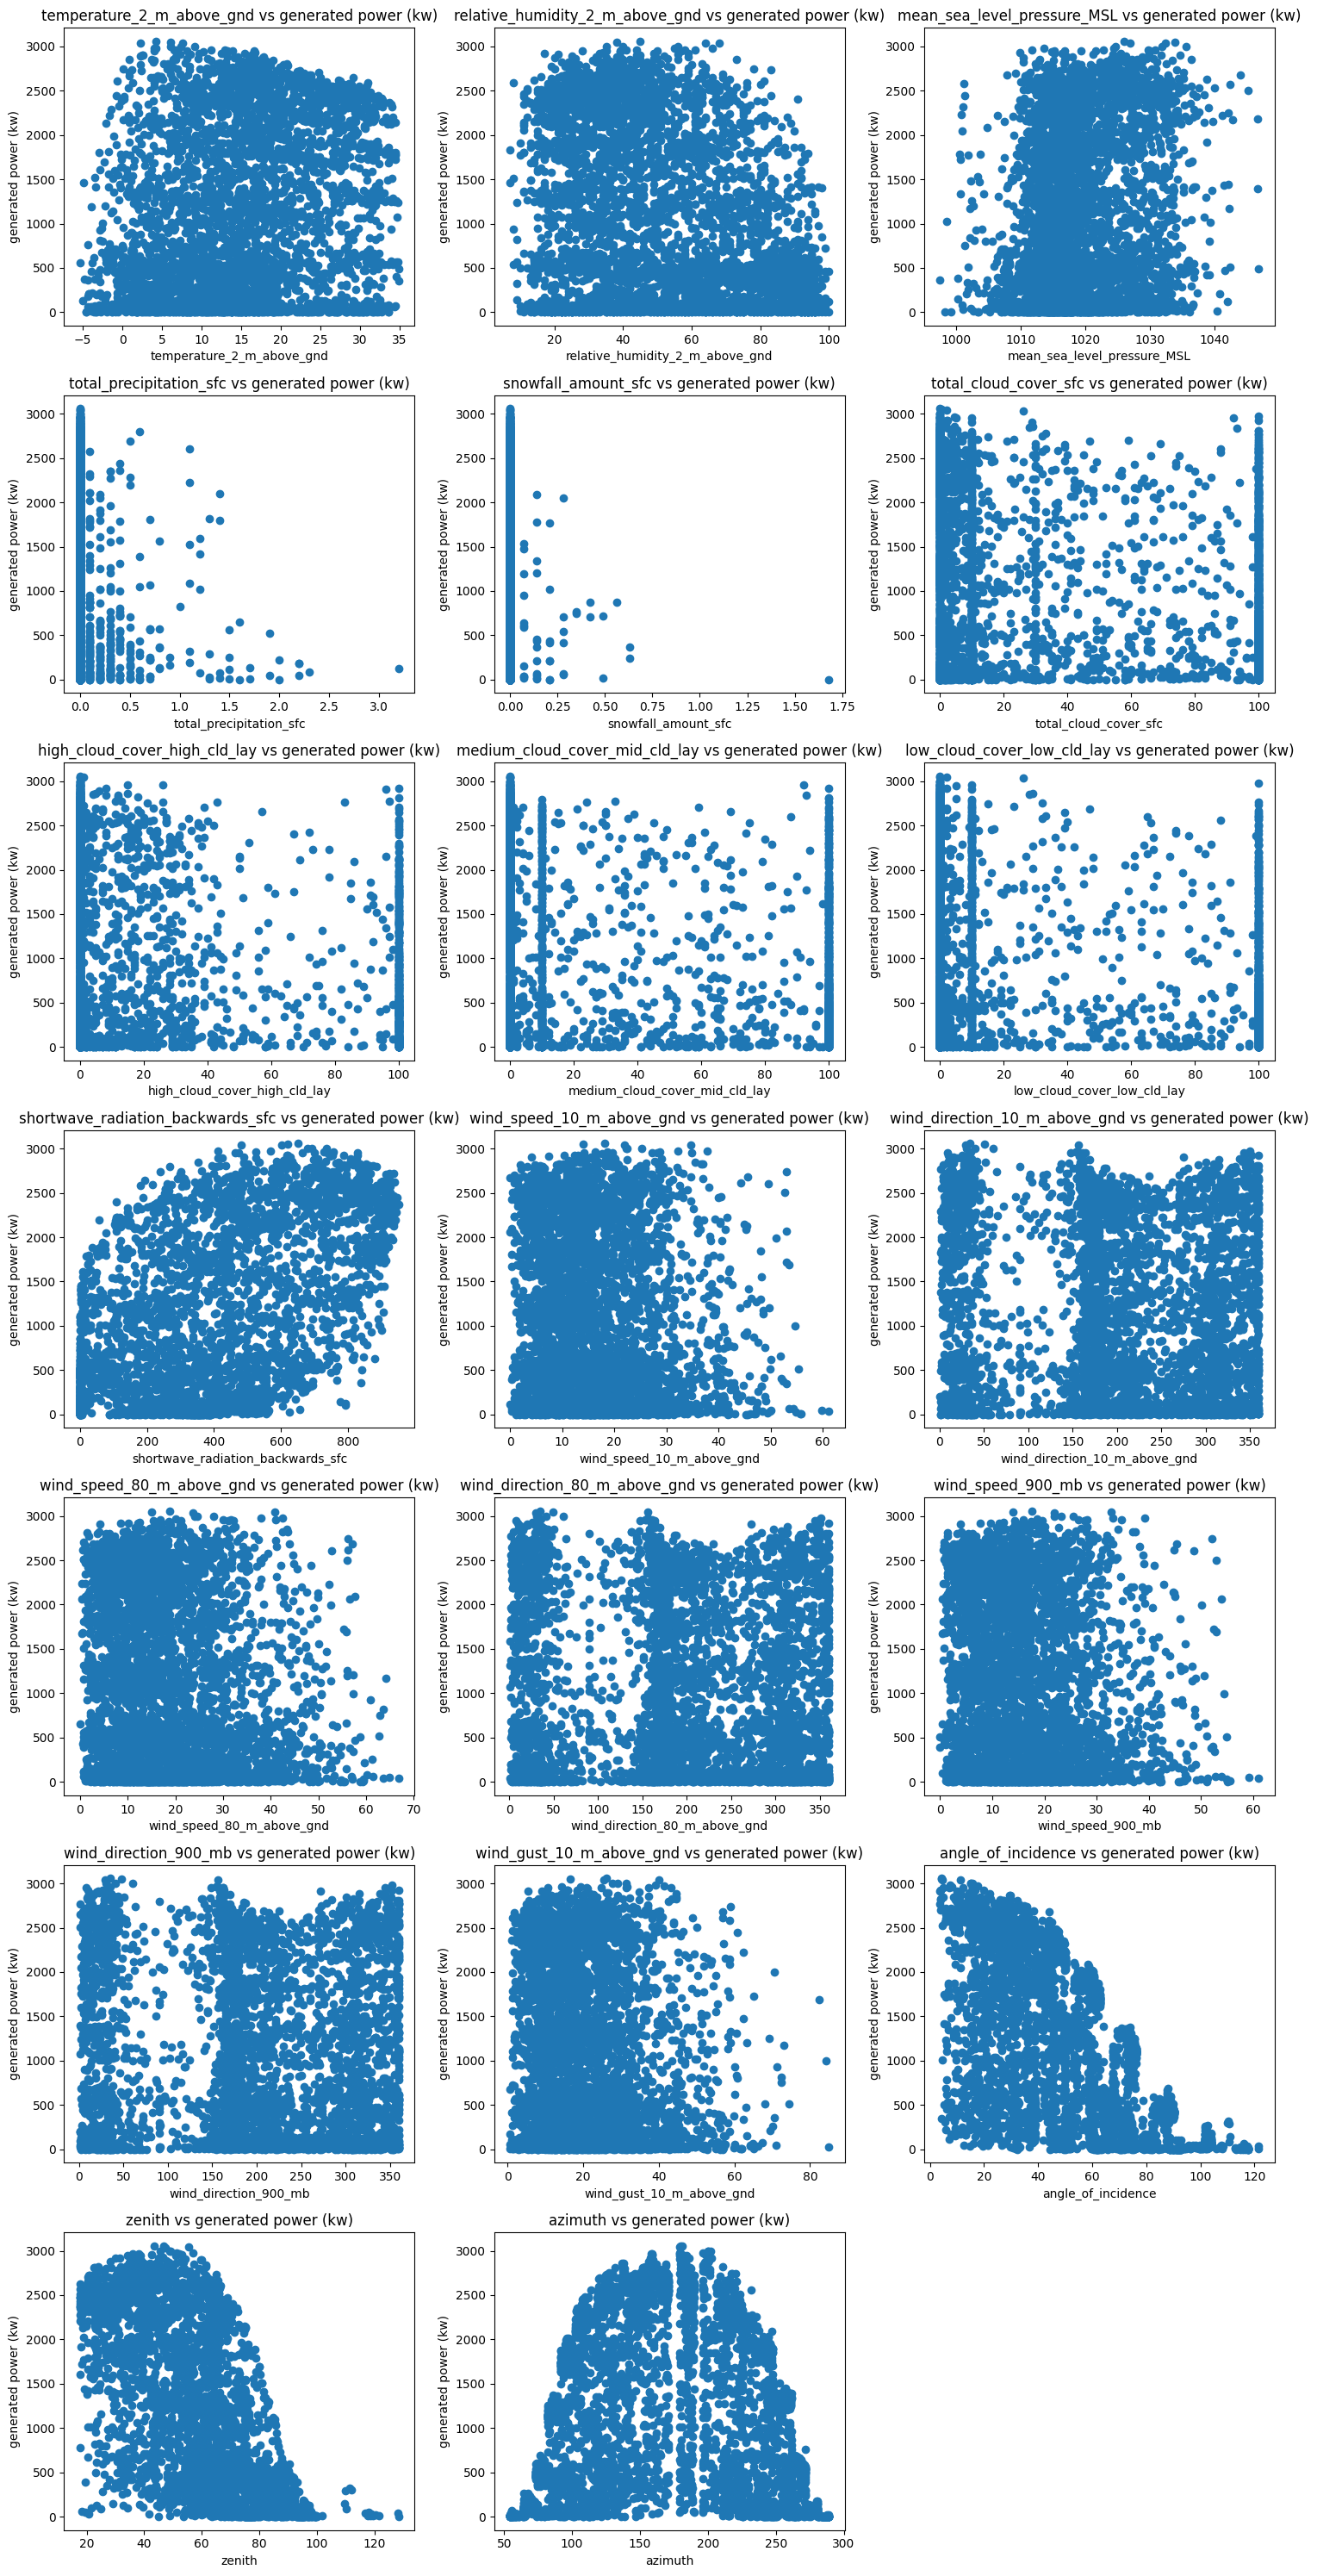

In [16]:
plt.figure(figsize=(15,30))
for i, column in enumerate(df.columns[:20]):
    plt.subplot(7,3,i+1)
    plt.scatter(df[column],df['generated_power_kw'])
    plt.title(f'{column} vs generated power (kw)')
    plt.xlabel(column)
    plt.ylabel('generated power (kw)')
plt.tight_layout()
plt.show()    

In [17]:
df.corr()

temperature_2_m_above_gnd  \
temperature_2_m_above_gnd                           1.000000   
relative_humidity_2_m_above_gnd                    -0.771704   
mean_sea_level_pressure_MSL                        -0.402240   
total_precipitation_sfc                            -0.083137   
snowfall_amount_sfc                                -0.121422   
total_cloud_cover_sfc                              -0.326641   
high_cloud_cover_high_cld_lay                      -0.019522   
medium_cloud_cover_mid_cld_lay                     -0.100980   
low_cloud_cover_low_cld_lay                        -0.381876   
shortwave_radiation_backwards_sfc                   0.665755   
wind_speed_10_m_above_gnd                          -0.172532   
wind_direction_10_m_above_gnd                       0.051393   
wind_speed_80_m_above_gnd                          -0.244869   
wind_direction_80_m_above_gnd                       0.086630   
wind_speed_900_mb                                  -0.198107   
wind_direction_900_mb                               0.043233   
wind_gust_10_m_above_gnd                           -0.188264   
angle_of_incidence                                 -0.090173   
zenith                                             -0.545646   
azimuth                                             0.381797   
generated_power_kw                                  0.217280   

                                   relative_humidity_2_m_above_gnd  \
temperature_2_m_above_gnd                                -0.771704   
relative_humidity_2_m_above_gnd                           1.000000   
mean_sea_level_pressure_MSL                               0.100529   
total_precipitation_sfc                                   0.168660   
snowfall_amount_sfc                                       0.113987   
total_cloud_cover_sfc                                     0.402895   
high_cloud_cover_high_cld_lay                             0.056452   
medium_cloud_cover_mid_cld_lay                            0.135347   
low_cloud_cover_low_cld_lay                               0.490402   
shortwave_radiation_backwards_sfc                        -0.721754   
wind_speed_10_m_above_gnd                                 0.109674   
wind_direction_10_m_above_gnd                             0.008902   
wind_speed_80_m_above_gnd                                 0.212868   
wind_direction_80_m_above_gnd                            -0.019408   
wind_speed_900_mb                                         0.135464   
wind_direction_900_mb                                     0.021068   
wind_gust_10_m_above_gnd                                  0.144807   
angle_of_incidence                                        0.268460   
zenith                                                    0.513748   
azimuth                                                  -0.525760   
generated_power_kw                                       -0.336783   

                                   mean_sea_level_pressure_MSL  \
temperature_2_m_above_gnd                            -0.402240   
relative_humidity_2_m_above_gnd                       0.100529   
mean_sea_level_pressure_MSL                           1.000000   
total_precipitation_sfc                              -0.159098   
snowfall_amount_sfc                                  -0.053871   
total_cloud_cover_sfc                                -0.151995   
high_cloud_cover_high_cld_lay                        -0.014646   
medium_cloud_cover_mid_cld_lay                       -0.129812   
low_cloud_cover_low_cld_lay                          -0.162043   
shortwave_radiation_backwards_sfc                    -0.188387   
wind_speed_10_m_above_gnd                            -0.170199   
wind_direction_10_m_above_gnd                        -0.119867   
wind_speed_80_m_above_gnd                            -0.131442   
wind_direction_80_m_above_gnd                        -0.161020   
wind_speed_900_mb                                    -0.145696   
wind_direction_900_mb        

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True,fmt='.2f')
plt.show()

## Outlier

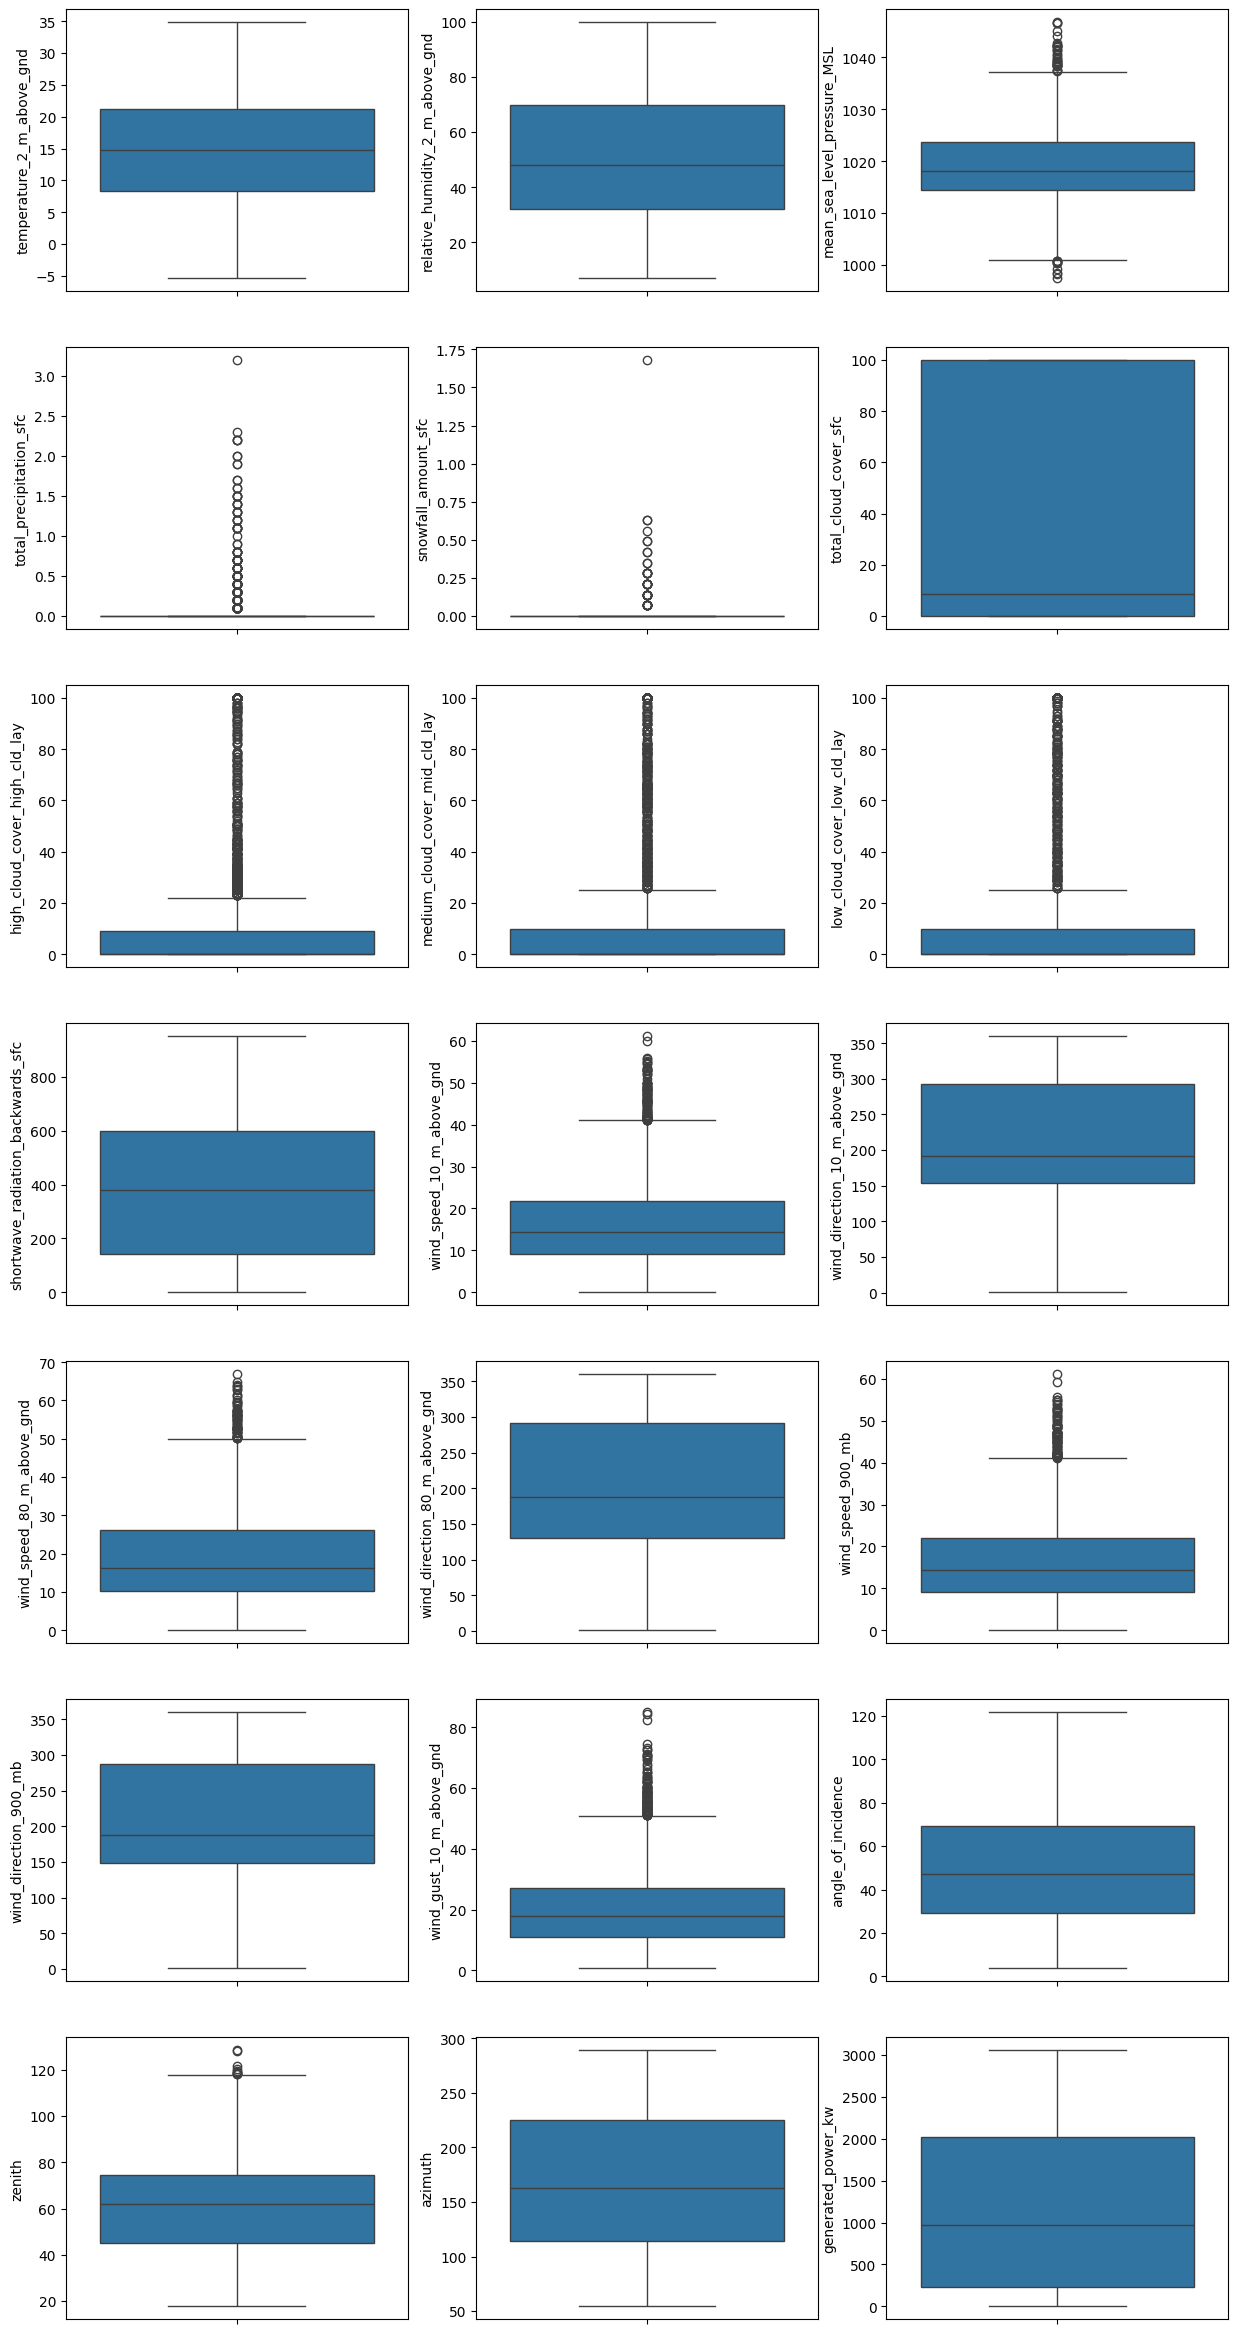

In [19]:
plt.figure(figsize=(15,30))
for i,column in enumerate(df.columns):
    plt.subplot(7,3,i+1)
    sns.boxplot(df[column])
plt.show()    

# linear regression model

In [20]:
pip install scikit-learn



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [21]:
import sklearn
print(sklearn.__version__)  # This should print the installed version


1.6.1


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [23]:
df.columns

Index(['temperature_2_m_above_gnd', 'relative_humidity_2_m_above_gnd',
       'mean_sea_level_pressure_MSL', 'total_precipitation_sfc',
       'snowfall_amount_sfc', 'total_cloud_cover_sfc',
       'high_cloud_cover_high_cld_lay', 'medium_cloud_cover_mid_cld_lay',
       'low_cloud_cover_low_cld_lay', 'shortwave_radiation_backwards_sfc',
       'wind_speed_10_m_above_gnd', 'wind_direction_10_m_above_gnd',
       'wind_speed_80_m_above_gnd', 'wind_direction_80_m_above_gnd',
       'wind_speed_900_mb', 'wind_direction_900_mb',
       'wind_gust_10_m_above_gnd', 'angle_of_incidence', 'zenith', 'azimuth',
       'generated_power_kw'],
      dtype='object')

In [24]:
# splitting the dataset into features and target
x = df.drop('generated_power_kw',axis=1)
y = df['generated_power_kw']

In [25]:
# splitting the dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [26]:
# scaling
scalar = StandardScaler()
x_train_scaled=scalar.fit_transform(x_train)
x_test_scaled=scalar.transform(x_test)

In [27]:
# training the model
model=LinearRegression()
model.fit(x_train_scaled,y_train)

LinearRegression()

In [28]:
# evaluating the model - test
y_pred=model.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
print(f"mean absolute error on test set:{mae}")


mean absolute error on test set:391.79269568403134


In [29]:
# evaluating the model on training set
y_pred_train=model.predict(x_train_scaled)
mae_train=mean_absolute_error(y_train,y_pred_train)
print(f"mean absolute error on train set:{mae_train}")

mean absolute error on train set:392.42118159774026


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define Features (X) and Target (y)
# Replace 'Solar_Output' with the actual column name of solar energy output
X = df.drop(columns=['generated_power_kw'])  # Features
y = df['generated_power_kw']  # Target

# Split Data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Plot actual vs predicted values
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Solar Output")
plt.ylabel("Predicted Solar Output")
plt.title("Actual vs Predicted Solar Output")
plt.show()



Model Performance:
Mean Squared Error (MSE): 257589.06
R² Score: 0.72


## checking if the dataset has curved trends

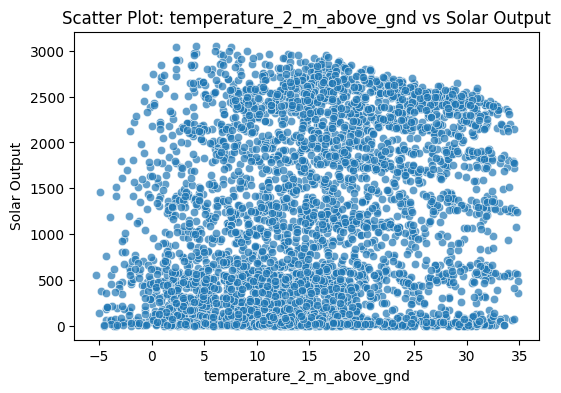

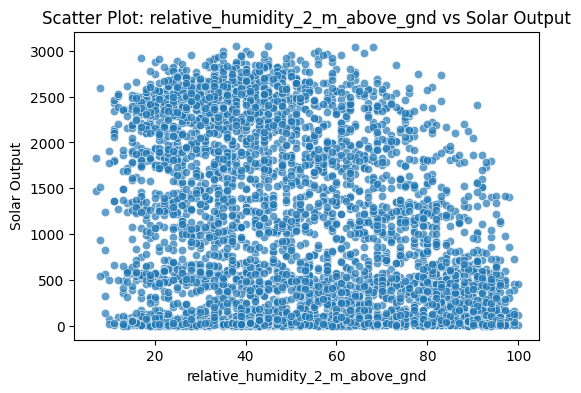

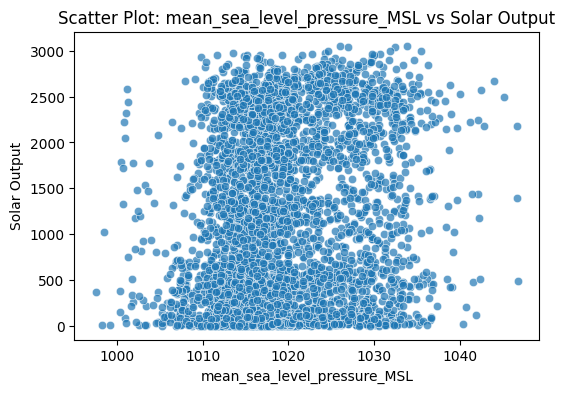

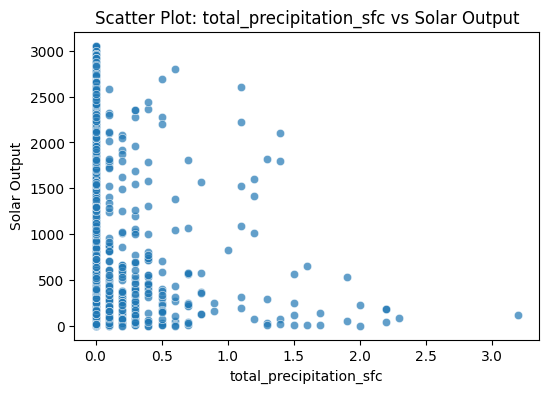

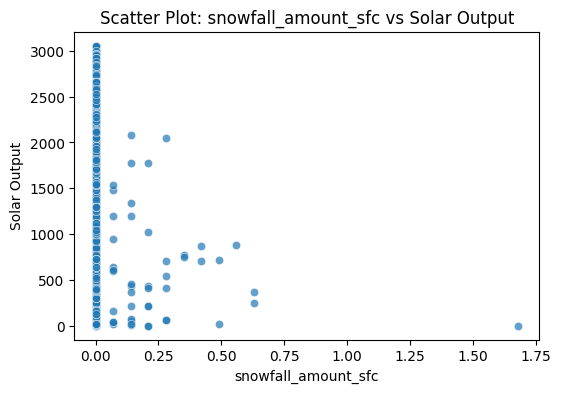

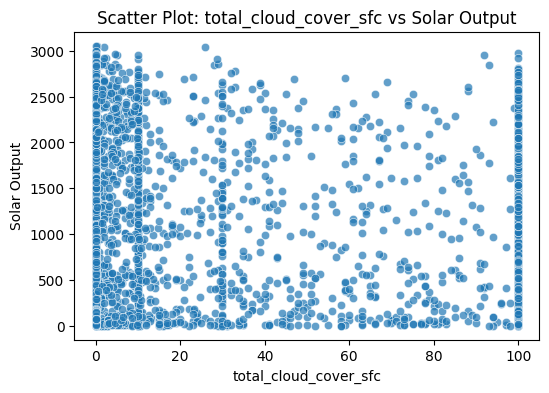

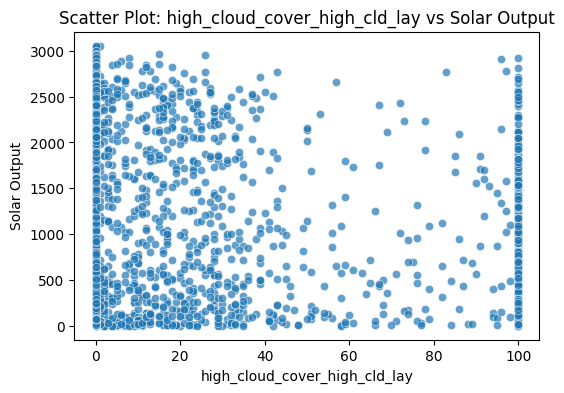

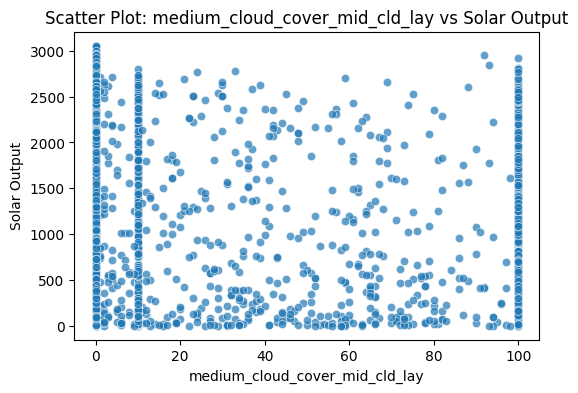

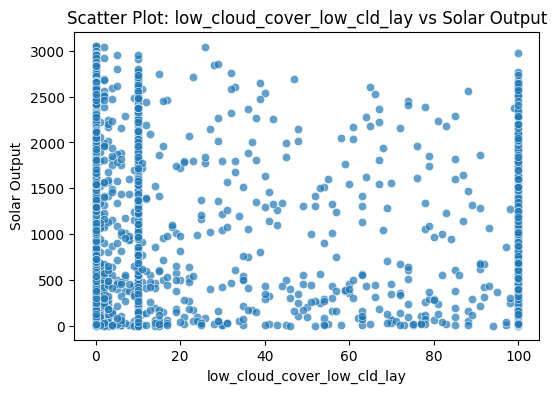

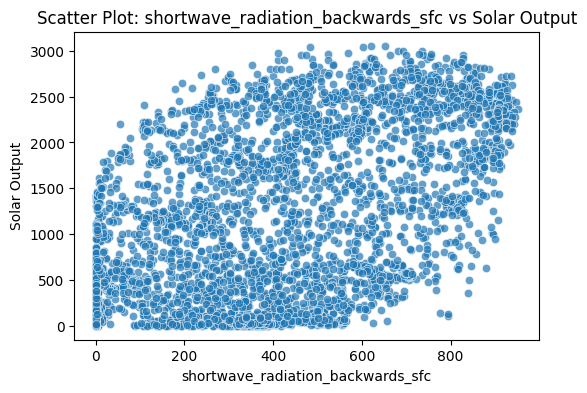

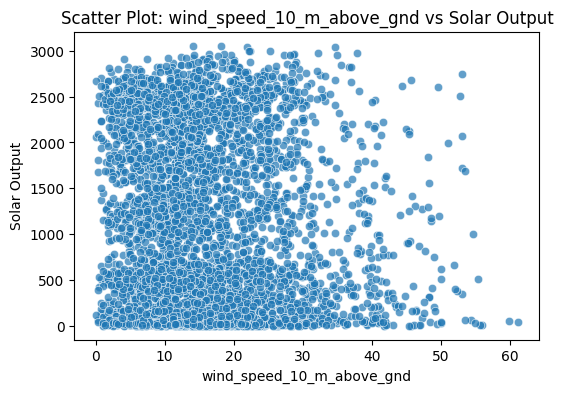

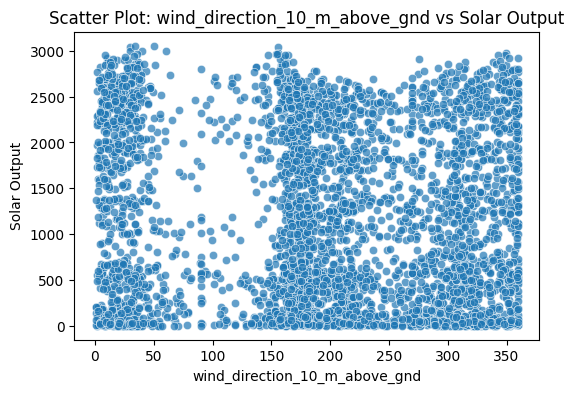

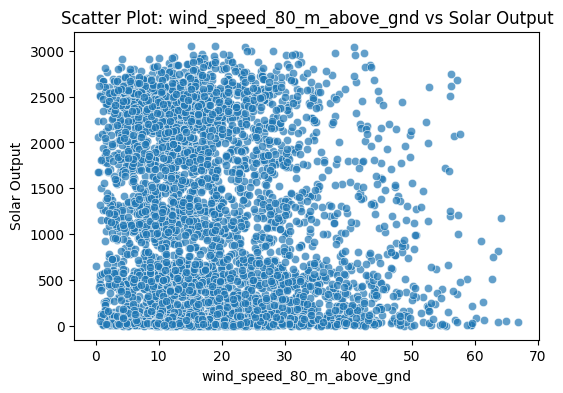

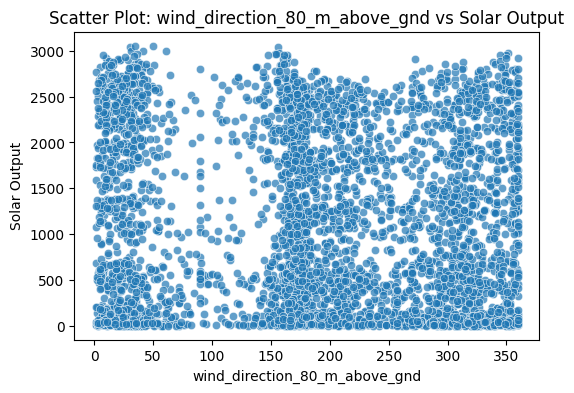

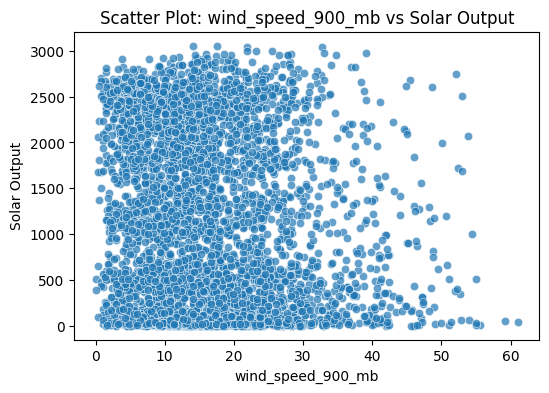

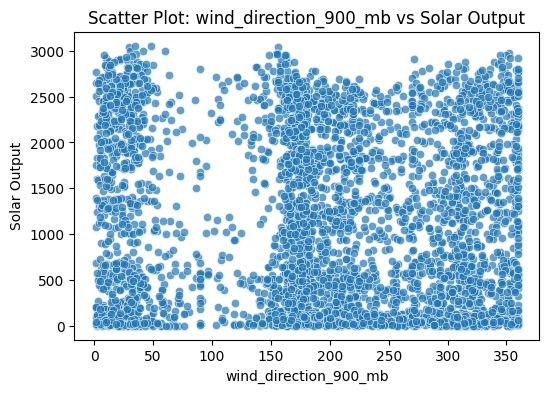

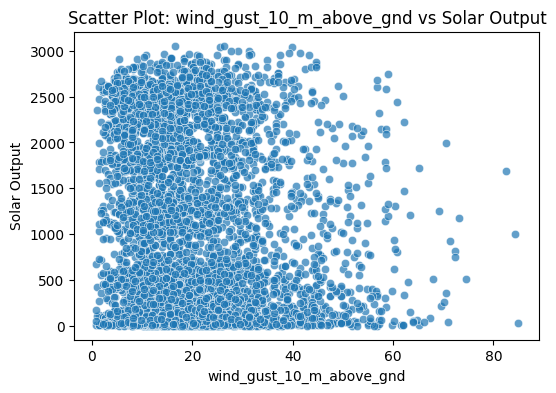

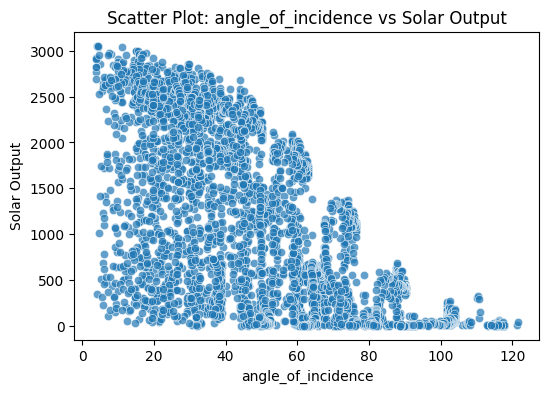

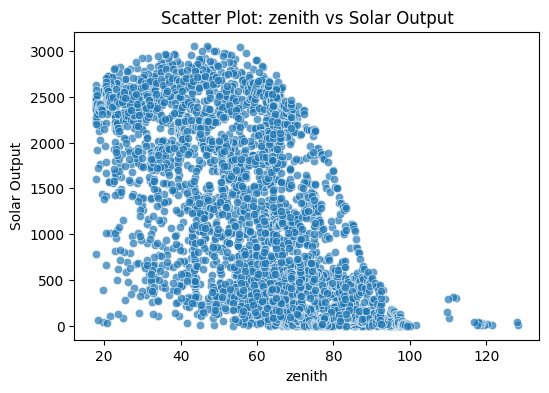

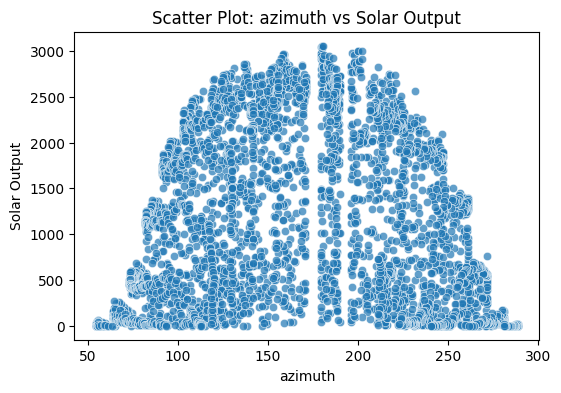

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns


for col in X.columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=X[col], y=y, alpha=0.7)
    plt.xlabel(col)
    plt.ylabel("Solar Output")
    plt.title(f"Scatter Plot: {col} vs Solar Output")
    plt.show()


### using polynomial regression

   temperature_2_m_above_gnd  relative_humidity_2_m_above_gnd  \
0                       2.17                               31   
1                       2.31                               27   
2                       3.65                               33   
3                       5.82                               30   
4                       7.73                               27   

   mean_sea_level_pressure_MSL  total_precipitation_sfc  snowfall_amount_sfc  \
0                       1035.0                      0.0                  0.0   
1                       1035.1                      0.0                  0.0   
2                       1035.4                      0.0                  0.0   
3                       1035.4                      0.0                  0.0   
4                       1034.4                      0.0                  0.0   

   total_cloud_cover_sfc  high_cloud_cover_high_cld_lay  \
0                    0.0                              0   
1         

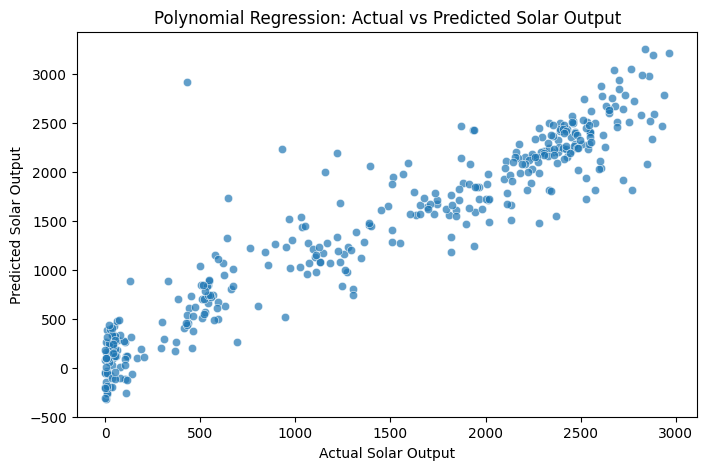

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Display basic info
print(df.head())
print(df.info())

# Drop missing values
df = df.dropna()

# Define Features (X) and Target (y)
X = df.drop(columns=['generated_power_kw'])  # Features
y = df['generated_power_kw'] 

# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transform features into polynomial (degree=2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train Polynomial Regression Model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict on test data
y_pred = model.predict(X_test_poly)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nPolynomial Regression Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Plot actual vs predicted values
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Solar Output")
plt.ylabel("Predicted Solar Output")
plt.title("Polynomial Regression: Actual vs Predicted Solar Output")
plt.show()


### Standardizing/Normalizing Features

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### identifying and removing outliers

       temperature_2_m_above_gnd  relative_humidity_2_m_above_gnd  \
count                4213.000000                      4213.000000   
mean                   15.068111                        51.361025   
std                     8.853677                        23.525864   
min                    -5.350000                         7.000000   
25%                     8.390000                        32.000000   
50%                    14.750000                        48.000000   
75%                    21.290000                        70.000000   
max                    34.900000                       100.000000   

       mean_sea_level_pressure_MSL  total_precipitation_sfc  \
count                  4213.000000              4213.000000   
mean                   1019.337812                 0.031759   
std                       7.022867                 0.170212   
min                     997.500000                 0.000000   
25%                    1014.500000                 0.000000   


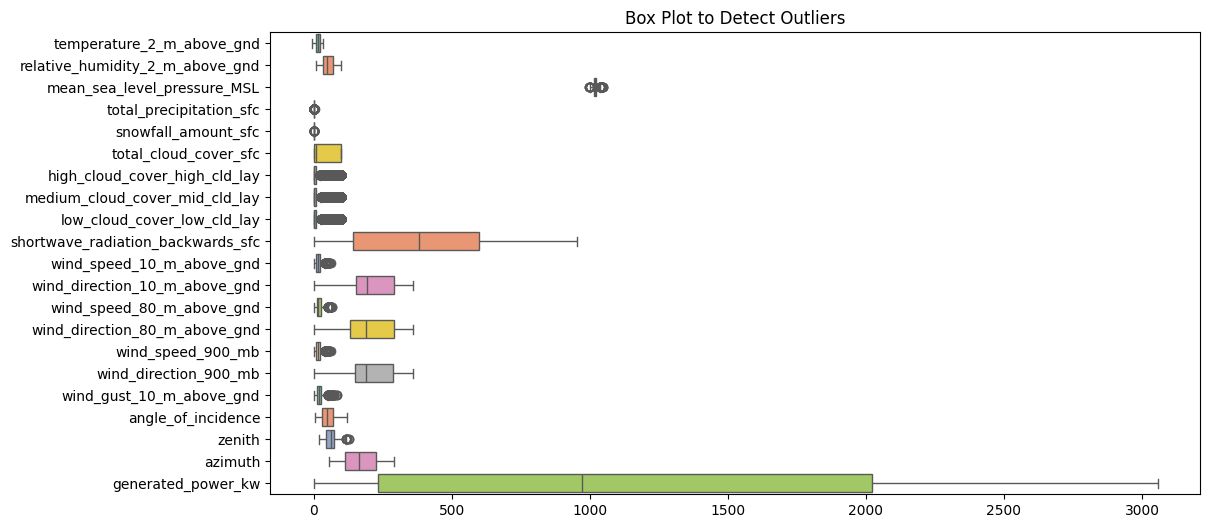

Dataset after removing outliers:
       temperature_2_m_above_gnd  relative_humidity_2_m_above_gnd  \
count                1865.000000                      1865.000000   
mean                   17.595298                        42.661662   
std                     8.705365                        20.606698   
min                    -5.350000                         7.000000   
25%                    11.230000                        26.000000   
50%                    17.360000                        39.000000   
75%                    24.210000                        55.000000   
max                    34.810000                       100.000000   

       mean_sea_level_pressure_MSL  total_precipitation_sfc  \
count                  1865.000000                   1865.0   
mean                   1020.646971                      0.0   
std                       6.392727                      0.0   
min                    1008.000000                      0.0   
25%                    1015.80

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Display basic statistics
print(df.describe())

# Visualizing data distribution with box plots 
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient='h', palette='Set2')
plt.title("Box Plot to Detect Outliers")
plt.show()

# Defining a function to remove outliers using IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # First quartile ie 25th percentile
    Q3 = data[column].quantile(0.75)  # Third quartile ie 75th percentile
    IQR = Q3 - Q1  # Interquartile range

    # Defining bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter data within bounds
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered_data

# Appling the function to each column 
columns_to_check = ['generated_power_kw', 'temperature_2_m_above_gnd', 'relative_humidity_2_m_above_gnd',
       'mean_sea_level_pressure_MSL', 'total_precipitation_sfc',
       'snowfall_amount_sfc', 'total_cloud_cover_sfc',
       'high_cloud_cover_high_cld_lay', 'medium_cloud_cover_mid_cld_lay',
       'low_cloud_cover_low_cld_lay', 'shortwave_radiation_backwards_sfc',
       'wind_speed_10_m_above_gnd', 'wind_direction_10_m_above_gnd',
       'wind_speed_80_m_above_gnd', 'wind_direction_80_m_above_gnd',
       'wind_speed_900_mb', 'wind_direction_900_mb',
       'wind_gust_10_m_above_gnd', 'angle_of_incidence', 'zenith', 'azimuth'] 
for col in columns_to_check:
    df = remove_outliers_iqr(df, col)

# Display updated statistics
print("Dataset after removing outliers:")
print(df.describe())

# Save the cleaned dataset 
df.to_csv("cleaned_dataset.csv", index=False)


### evaluating the polynomial regression model

Model Evaluation Metrics:
Mean Squared Error (MSE): 102902.70
Root Mean Squared Error (RMSE): 320.78
Mean Absolute Error (MAE): 224.44
R² Score: 0.89


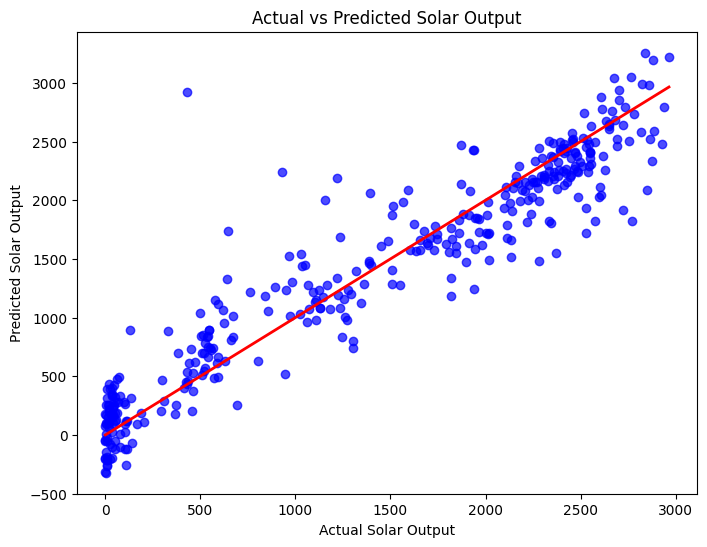

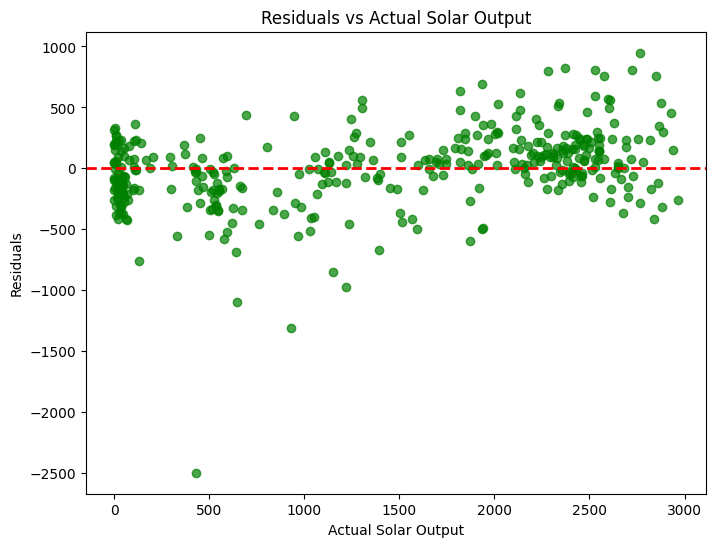

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test (actual values) and y_pred (predicted values)

# Calculate Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print Metrics
print("Model Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

# Scatter Plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", lw=2)
plt.title("Actual vs Predicted Solar Output")
plt.xlabel("Actual Solar Output")
plt.ylabel("Predicted Solar Output")
plt.show()

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, alpha=0.7, color="green")
plt.axhline(0, color="red", linestyle="--", lw=2)
plt.title("Residuals vs Actual Solar Output")
plt.xlabel("Actual Solar Output")
plt.ylabel("Residuals")
plt.show()


### interpreting the results - 

Alignment with the Red Line:
The red line represents the ideal prediction line (𝑦=𝑥) where predicted values perfectly match the actual values.
The points closely follow this line, indicating a good model fit overall. However, there are deviations that suggest some prediction errors.

Spread of Data Points:
There is more variance as the actual solar output increases.
This could indicate that the model is performing better for smaller output values and less accurately for larger ones.

### calculating performance metrics

In [37]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calculate R² Score
r2 = r2_score(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Display the results
print(f"R² Score: {r2:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


R² Score: 0.89
Mean Squared Error (MSE): 102902.70
Root Mean Squared Error (RMSE): 320.78


### improvements -

1. Polynomial Regression:
Performs hyperparameter tuning to find the optimal degree.
Evaluates the RMSE for each degree and selects the best one.

2. Random Forest Regression:
Uses GridSearchCV for hyperparameter optimization to find the best configuration.

3. Feature Scaling:
Standardizes features using StandardScaler to ensure consistent scaling.

4. Evaluation Metrics:
Compares R² and RMSE for both models.

5. Visualization:
Plots predictions for both Polynomial and Random Forest models against the actual solar output.


Best Degree for Polynomial Regression: 2
Best RMSE for Polynomial Regression: 320.7845063104969
Polynomial Regression:
R² Score: 0.8948007533992376
RMSE: 320.7845063104969

Random Forest Regression:
R² Score: 0.9211206038023151
RMSE: 277.77225080774303


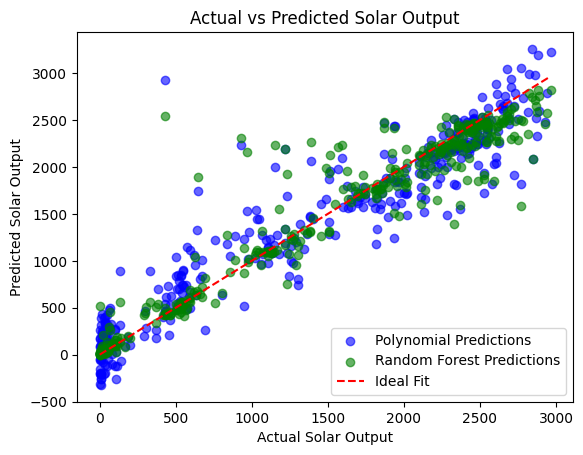

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

data = pd.read_csv(r"c:\Users\HP\Desktop\solar\cleaned_dataset.csv")



# Data Preprocessing
X = data.drop(columns=['generated_power_kw']) 
y = data['generated_power_kw']

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Polynomial Regression with Hyperparameter Tuning
degrees = [2, 3, 4, 5]
best_degree = 2
best_rmse = float('inf')

for degree in degrees:
    poly_features = PolynomialFeatures(degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    y_pred = model.predict(X_test_poly)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    if rmse < best_rmse:
        best_rmse = rmse
        best_degree = degree

print(f"Best Degree for Polynomial Regression: {best_degree}")
print(f"Best RMSE for Polynomial Regression: {best_rmse}")

# Train Polynomial Regression with Best Degree
poly_features = PolynomialFeatures(best_degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

# Random Forest Regression
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf_model, rf_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Model Evaluation
print("Polynomial Regression:")
print(f"R² Score: {r2_score(y_test, y_pred_poly)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_poly))}")

print("\nRandom Forest Regression:")
print(f"R² Score: {r2_score(y_test, y_pred_rf)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf))}")

# Visualization
plt.scatter(y_test, y_pred_poly, color="blue", alpha=0.6, label="Polynomial Predictions")
plt.scatter(y_test, y_pred_rf, color="green", alpha=0.6, label="Random Forest Predictions")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Ideal Fit")
plt.xlabel("Actual Solar Output")
plt.ylabel("Predicted Solar Output")
plt.title("Actual vs Predicted Solar Output")
plt.legend()
plt.show()
